In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import sklearn.linear_model as linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('air_polution.csv')
df

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


<AxesSubplot:xlabel='AQI Value', ylabel='PM2.5 AQI Value'>

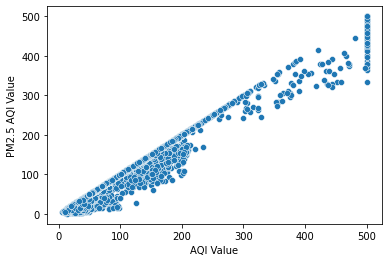

In [3]:
sns.scatterplot(data=df, x='AQI Value', y='PM2.5 AQI Value')

In [4]:
aqi_value = df['AQI Value'].values.reshape(-1, 1)
lign_reg = linear_model.LinearRegression()
lign_reg.fit(aqi_value, df['PM2.5 AQI Value'])

LinearRegression()

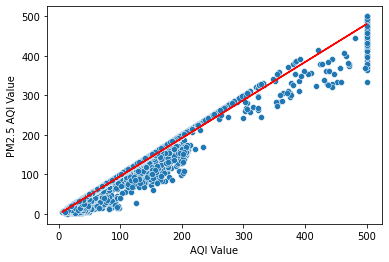

In [24]:
sns.scatterplot(data=df, x='AQI Value', y='PM2.5 AQI Value')
plt.plot(aqi_value, lign_reg.predict(aqi_value), color='red')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()

In [6]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [7]:
missing_values = df.isnull().sum()
df.dropna(inplace=True)


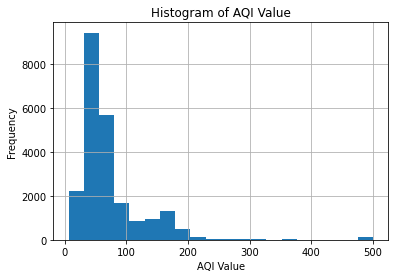

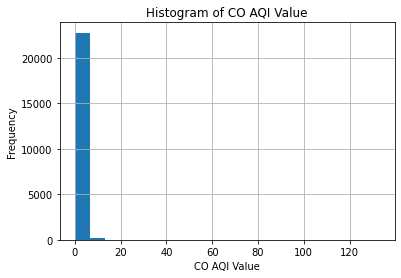

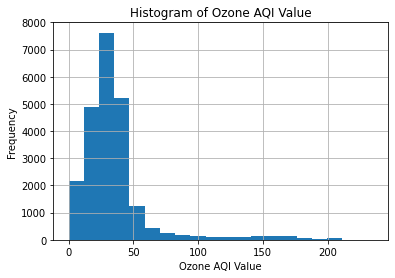

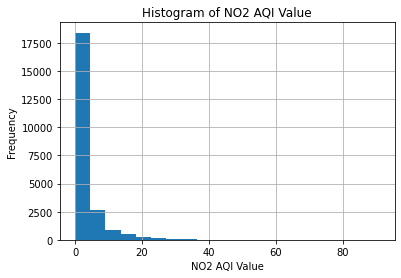

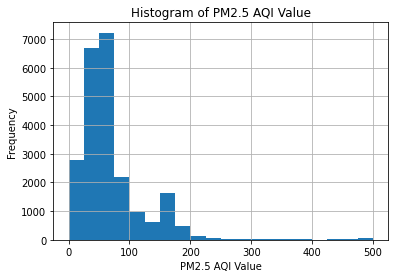

In [26]:
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
for i in range(len(col)):
    df[col[i]].hist(bins=20)
    plt.title('Histogram of ' + col[i])
    plt.xlabel(col[i])
    plt.ylabel('Frequency')
    plt.show()


    # df['AQI Value'].hist(bins=20)
    # plt.title('Histogram of AQI')
    # plt.xlabel('AQI Value')
    # plt.ylabel('Frequency')
    # plt.show()

In [27]:
df['AQI Value'].skew()
df['PM2.5 Value'].skew()

3.2779963478141614

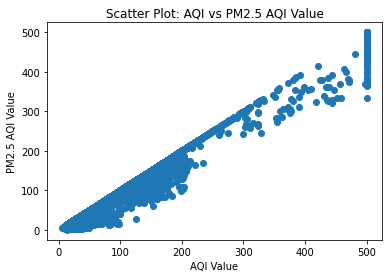

In [12]:
# Create scatter plots to visualize the relationship between AQI and another numerical variable
plt.scatter(df['AQI Value'], df['PM2.5 AQI Value'])
plt.title('Scatter Plot: AQI vs PM2.5 AQI Value')
plt.xlabel('AQI Value')
plt.ylabel('PM2.5 AQI Value')
plt.show()


In [14]:
# Feature Selection
# Correlation matrix
corr_matrix = df.corr()
corr_matrix['AQI Value'].sort_values(ascending=False)


AQI Value          1.000000
PM2.5 AQI Value    0.984518
CO AQI Value       0.429643
Ozone AQI Value    0.405086
NO2 AQI Value      0.230845
Name: AQI Value, dtype: float64

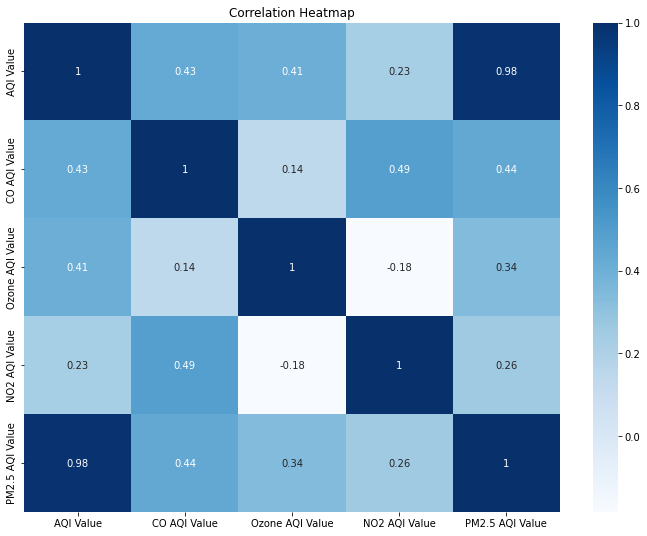

In [15]:
# Create a correlation heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

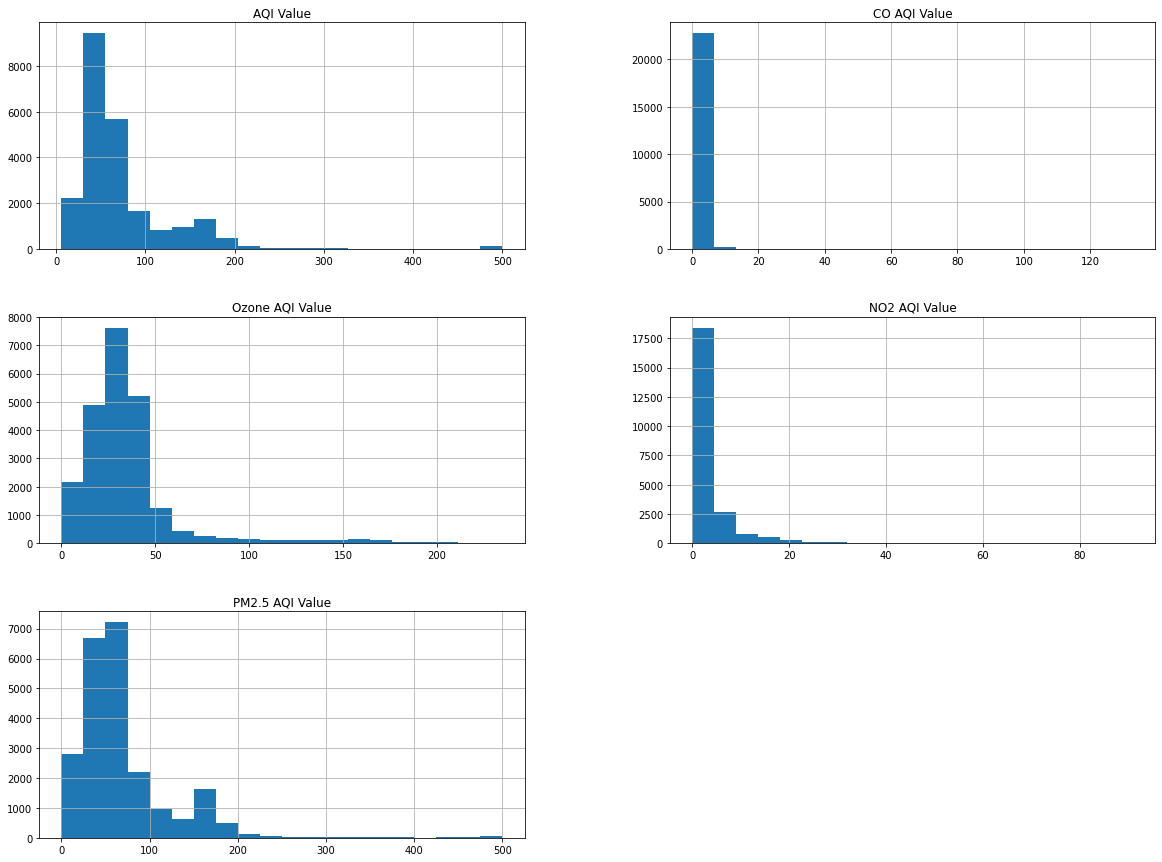

In [17]:
# create histogram from all numerical variables
df.hist(bins=20, figsize=(20, 15))
plt.show()

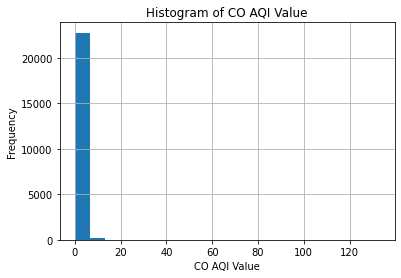

In [21]:
# histogram of CO AQI Value
df['CO AQI Value'].hist(bins=20)
plt.title('Histogram of CO AQI Value')
plt.xlabel('CO AQI Value')
plt.ylabel('Frequency')
plt.show()

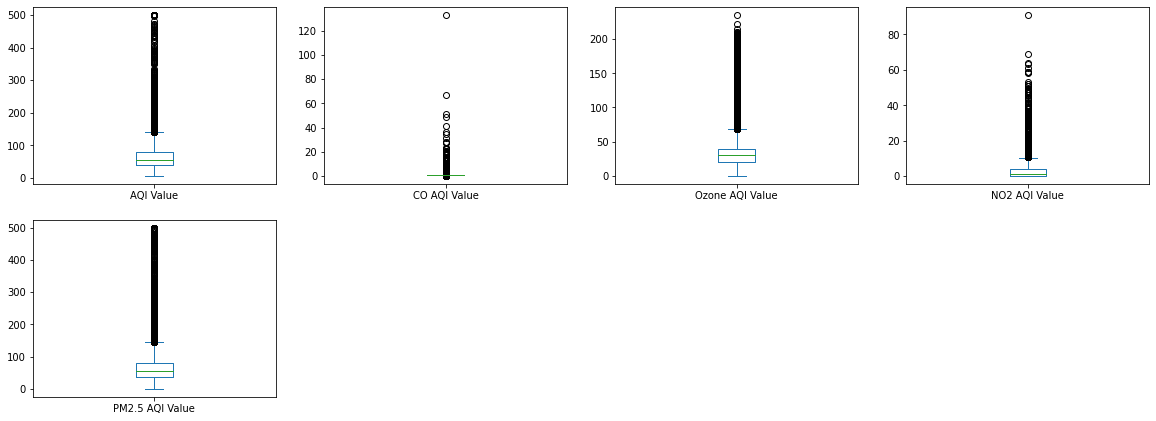

In [22]:
# create box plot for all numerical variables
df.plot(kind='box', subplots=True, layout=(4, 4), figsize=(20, 15))
plt.show()

KeyError: 'State Name'